# EDA ON TITANIC DATASET

1.Undoubtedly one of the most well-known shipwrecks in history is the sinking of the Titanic. The RMS Titanic, which was widely believed to be "unsinkable", sank on April 15, 1912, after striking an iceberg while on her first voyage. Unfortunately, there were not enough lifeboats to accommodate everyone, and 1502 out of 2224 passengers and staff perished.                                                                                                                                                

Even while survival required a certain amount of luck, it appears that some groups of people had a higher chance of living than others.                                                                                                                                                                                                                                                      

The [titanic dataset's](https://www.kaggle.com/competitions/titanic) "train.csv" [file](https://www.kaggle.com/competitions/titanic/data?select=train.csv) contains information on a subset of the passengers (891 to be exact) and, crucially, will reveal whether or not they survived, also known as the "ground truth." Moreover, we will delve deeper into the dataset to discover more about the passengers.


In [1]:
# load libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set up the Titanic csv file as a DataFrame
titanic= pd.read_csv('train.csv')

# Preview the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. This dataframe has 12 columns including some of the columns listed below:

Survived- Indicates if a passenger survived or not using 0 and 1; 0=died, 1=survived

Pclass-   Travelling class of a passenger; has values 1, 2, 3

SibSp-    Number of siblings or spouses aboard; 0= no sibling or spouse, 1= sibling or spouse or both

Parch-    Number of Parents or Children aboard; 0= no  Parents or Children, 1= numbe of parents or children aboard

Embarked- Passenger boarding place (C = Cherbourg, Q = Queenstown, S = Southampton)

3. We can also get a jist of the dataset using the .info() method as follows:

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


4. We see that there are only 204 values in the 'Cabin' field and 714 values in the 'Age' field. There is no way to find out the 'Cabin' ID or 'Age' of every passenger. So we'll drop the 'Cabin' field and clear the blanks from the 'Age' field. Let's get to it then.


## Cleaning and Preparing the Data

In [3]:
# keep only non NA values from Embarked
titanic=titanic[titanic['Embarked'].notna()]

# keep only non NA values from Age
titanic=titanic[titanic['Age'].notna()]

# drop Cabin field
titanic.drop(["Cabin"], axis=1, inplace=True)

5. Let's check if we have no missing records in the dataframe now.

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


6. Now that our dataset is cleaned and prepared, let's proceed ahead to the analysis part.

## Analysis

7. Let's take a look at the gender-wise passenger distribution.

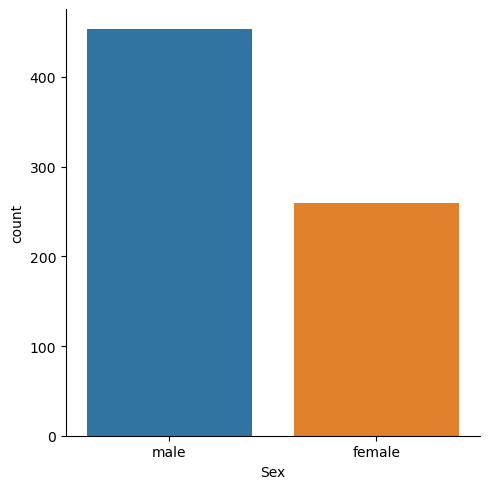

In [5]:
sns.catplot(x='Sex',data=titanic, kind='count')

8. Let's take a look at how many people survived from these 2 genders individually.

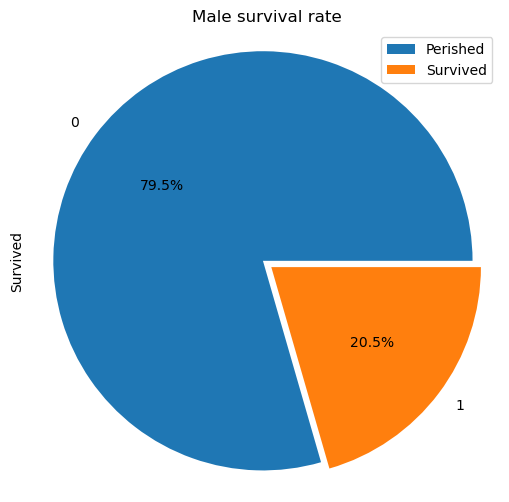

In [6]:
titanic[titanic['Sex'] == 'male'].Survived.groupby(titanic.Survived).count().plot(kind='pie', 
                                                                                  figsize=(6, 6),explode=[0,0.05],
                                                                                  autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show() 

9. Let's look at the survival rate of the females.

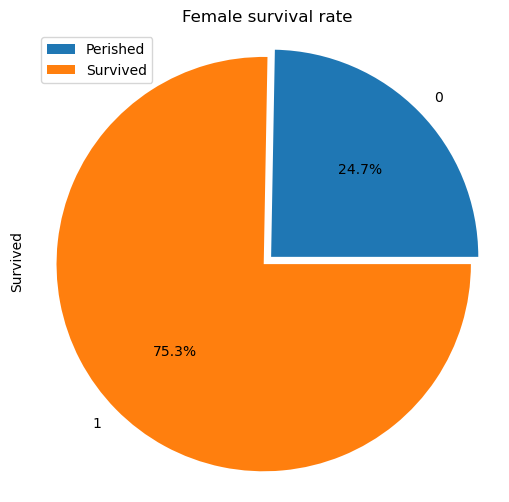

In [7]:
titanic[titanic['Sex'] == 'female'].Survived.groupby(titanic.Survived).count().plot(kind='pie',
                                                                                    autopct='%1.1f%%',figsize=(6, 6),
                                                                                    explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","Survived"])
plt.show() 

10. Such a huge difference in the survival rates of males and females.


11. Onboard the ship, there were many children as well. Let's take a look at the number of children aboard.

For this, we'll first define a function that separates the passengers into 3 classes- Male, Female, and Child- based on their ages. Let's assume that anyone under 16 years is a child.

In [8]:
# Anyone <16 years=child
# First let's make a function to sort through the sex

def male_female_child(passenger):
    
    age,sex = passenger 
    
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

# New column called 'person' 

titanic['person'] = titanic[['Age','Sex']].apply(male_female_child,axis=1)    

12. To check if this worked, let's grab the first few rows of the dataframe.

In [9]:
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,child


13. Great! Let's plot this then.

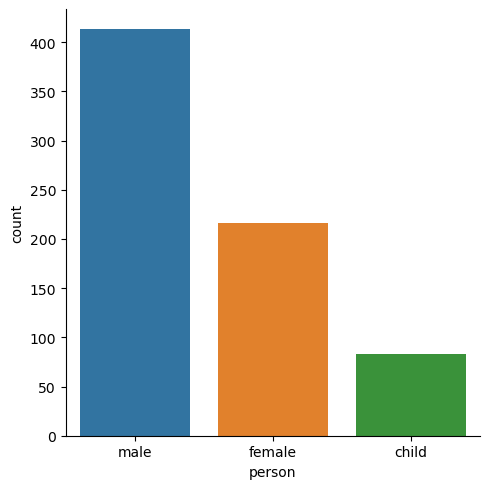

In [10]:
sns.catplot(x='person',data=titanic, kind='count')

14. The 'Person' field will be more useful when we examine the survival chances of all the passengers. For now, let's move ahead and take a look at the distribution of the genders with respect to the passenger class, i.e., 'Pclass'.

15. Let us now take a look at the survival rate of children.

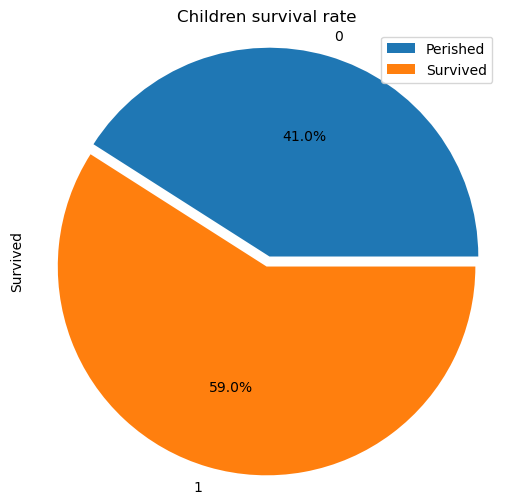

In [11]:
titanic[titanic['person'] == 'child'].Survived.groupby(titanic.Survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Children survival rate")
plt.legend(["Perished","Survived"])
plt.show() 

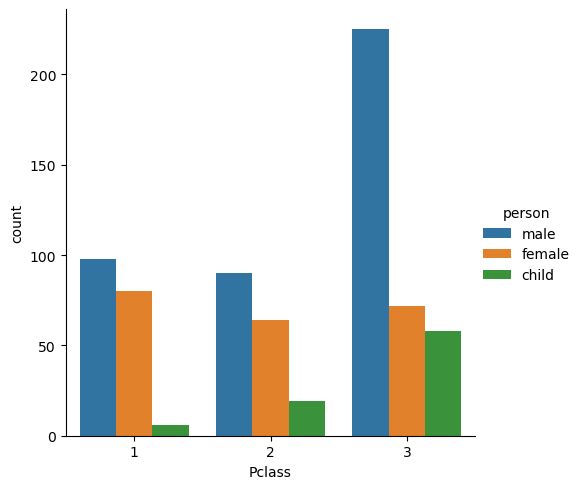

In [12]:
sns.catplot(x='Pclass',data=titanic,hue='person', kind='count')

16. It's pretty clear from the above plot that there were barely any children in the 1st class, whereas the number of males in the 3rd class was the highest amongst all travel classes. 

17. Now that we know the individual survival rates, let's compare the number of passengers who survived with those who perished.

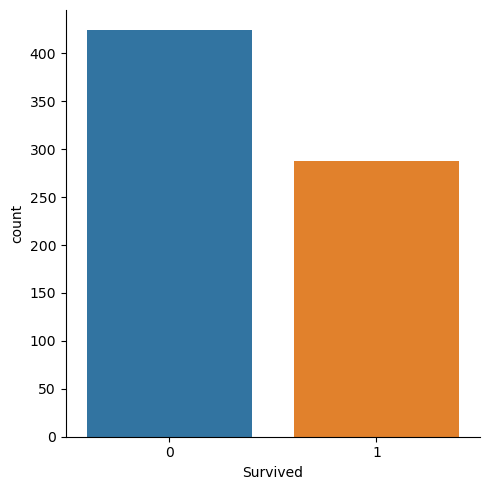

In [13]:
sns.catplot(x='Survived', data= titanic, kind= 'count')

18. More people perished than survived, as is already known. Let's now take a look the survival rate for different classes(Pclass).

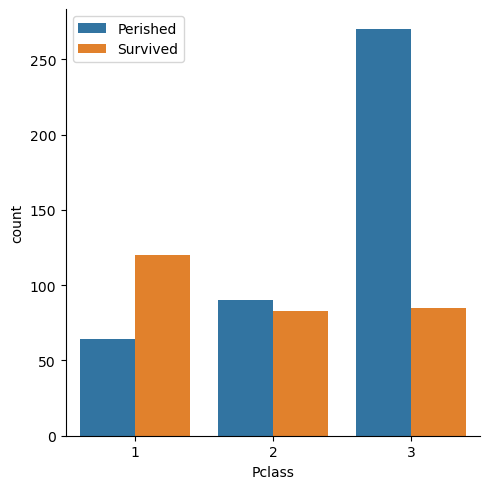

In [14]:
sns.catplot(x='Pclass', data=titanic, hue='Survived', kind= 'count' , legend=False)
plt.legend(loc='upper left', labels=['Perished', 'Survived'])

19. Most people who survived were from the 1st class, whereas the people who perished were mostly from the 3rd class. Passengers from the 2nd class were almost equally divided into those who died and those who survived.

20. Moving ahead, we'll take a look at the age distribution of the passengers, starting with the mean age of the passengers and then plotting their ages as a histogram. 

In [15]:
print("The mean age of the passengers onboard is {:.2f}".format(titanic['Age'].mean()))

# temp dataframe to store mean ages of different 'persons'
mean_ages = titanic.groupby('person')['Age'].mean()

print("The mean age of the Males onboard is: {:.2f} ".format(mean_ages['male']))

print("The mean age of the females onboard is: {:.2f}".format(mean_ages['female']))
            
print("The mean age of the children onboard is: {:.2f}".format(mean_ages['child']))

The mean age of the passengers onboard is 29.64
The mean age of the Males onboard is: 33.17 
The mean age of the females onboard is: 31.83
The mean age of the children onboard is: 6.37


21. Now that we know the mean age of all three groups, let's make a plot of different age groups. 


<AxesSubplot:>

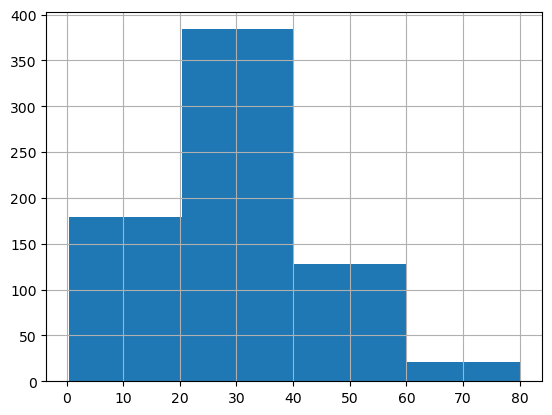

In [16]:
# plot of ages, grouped 4 times
titanic['Age'].hist(bins=4)

22. The above plot makes clear that most passengers were aged between 20-40, whereas only a few passengers were aged above 60. 


23. Now that we've visualized the age distribution of the passengers, let's check out the gender-wise age distribution.

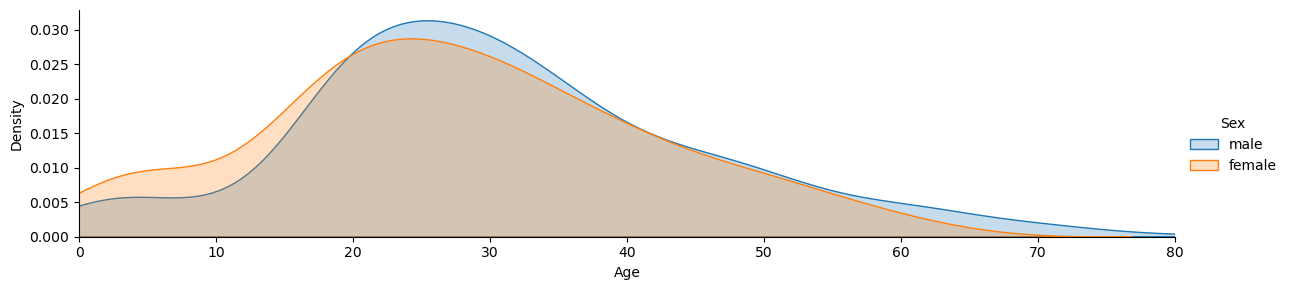

In [17]:
fig = sns.FacetGrid(titanic, hue="Sex",aspect=4)

fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

24.  With this plot, it is clear that the ship had more males in age group 20-40 and 60-80, whereas there were more females in the younger age group of under 20 years.


25. Now let's take a look at the age distribution amongst different classes. To do this, we'll associate the 'Pclass' field with hue.

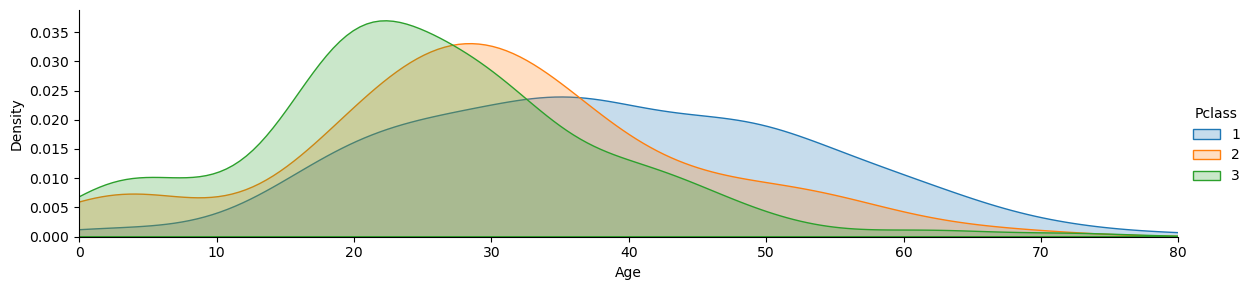

In [18]:
fig = sns.FacetGrid(titanic, hue="Pclass",aspect=4)

fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

26. In the 1st class, the majority of passengers were from 30-50 age group, while in the 2nd class, most people were from 20-40 age group. In the 3rd class, most people were in the 20-30 age group.


27. Let's preview our dataset again before proceeding with the analysis.

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male


28. Here, the fields 'SibSp' and 'Parch' indicate Sibling and/or Spouse, and Parent and/or Children, respectively. These two fields, when taken together, can tell us who was travelling alone and who with family. So let's create a function and proceed ahead with the same.

In [20]:
# Adding the parent/child column with the sibsp column
# If the value >0, then the person has family onboard
# If value=0, the person is travelling alone

titanic['Companions'] =  titanic.Parch + titanic.SibSp
titanic['Family Members']= titanic['Companions']

# checking new field 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     712 non-null    int64  
 1   Survived        712 non-null    int64  
 2   Pclass          712 non-null    int64  
 3   Name            712 non-null    object 
 4   Sex             712 non-null    object 
 5   Age             712 non-null    float64
 6   SibSp           712 non-null    int64  
 7   Parch           712 non-null    int64  
 8   Ticket          712 non-null    object 
 9   Fare            712 non-null    float64
 10  Embarked        712 non-null    object 
 11  person          712 non-null    object 
 12  Companions      712 non-null    int64  
 13  Family Members  712 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 99.6+ KB


29. Let's create a simple plot from the 'Companions' field to check how many family members the passengers were travelling with.

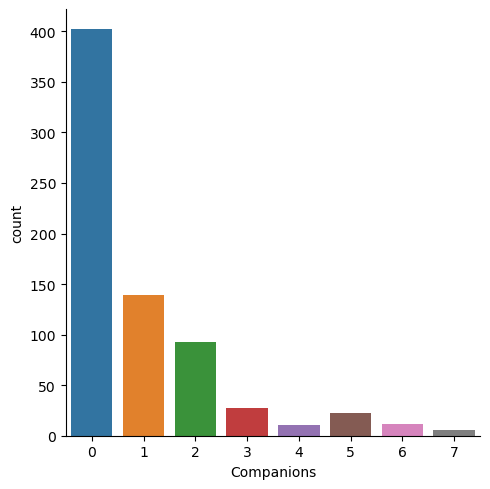

In [21]:
sns.catplot(x='Companions', data=titanic, kind= 'count')

30. We observe that most people onboard were travelling withput any family member. Out of the ones who were travelling with family, most people had one family member onboard, whereas some people were travelling with as much as 7 members. Interesting find!        


31. Moving ahead, let's edit the 'Companions' field now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone. To do this, we'll replace all the occourences of 0 in this field with 'Alone', and anything other than 0 as 'With Family'.

In [22]:
# Check for >0 or ==0 to set alone status
titanic['Companions'].loc[titanic['Companions'] >0] = 'With Family'
titanic['Companions'].loc[titanic['Companions'] == 0] = 'Alone'


C:\Users\user\AppData\Local\Temp\ipykernel_4368\2082218423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Companions'].loc[titanic['Companions'] >0] = 'With Family'


32. Let's check if we have what we need.

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Companions,Family Members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone,0


33. We'll now create a simple plot from the Companions field, comparing the people who travelled solo with the ones who were with family.

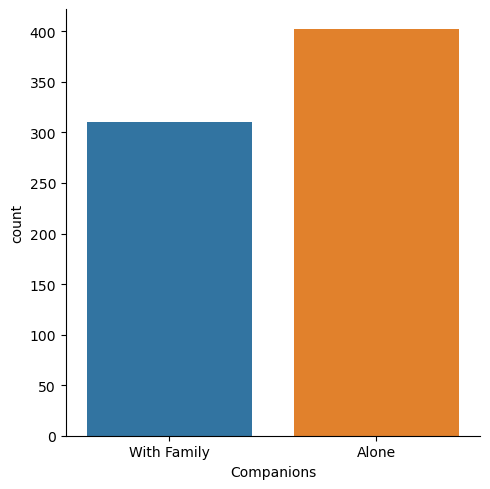

In [24]:
sns.catplot(x='Companions', data=titanic, kind= 'count')

34. We now know that more people were travelling alone than with family. It'd be interesting to observe this distribution clubbed with the passenger class(Pclass).

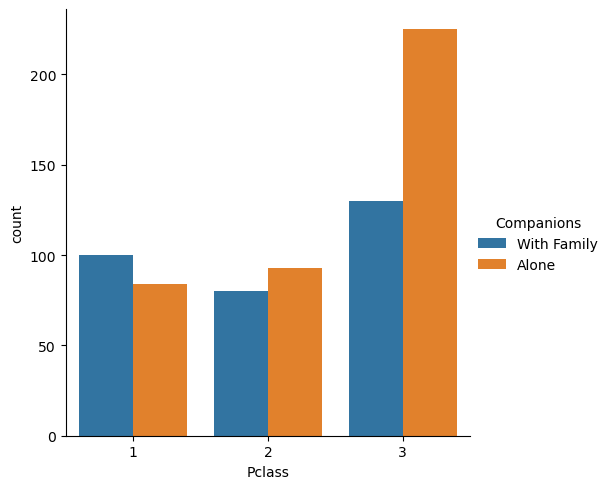

In [25]:
sns.catplot(x='Pclass', hue= 'Companions', kind= 'count', data= titanic)

35. It is pretty clear from this plot that in the 1st and 2nd classes, the difference between passengers travelling alone and without family was not a lot. More on this when we look at the survival chances of passengers.


36. It'd be interesting to see how travelling with family or solo affected their chances of surviving. To do that, let's move on to examine the factors that helped someone survive the sinking.

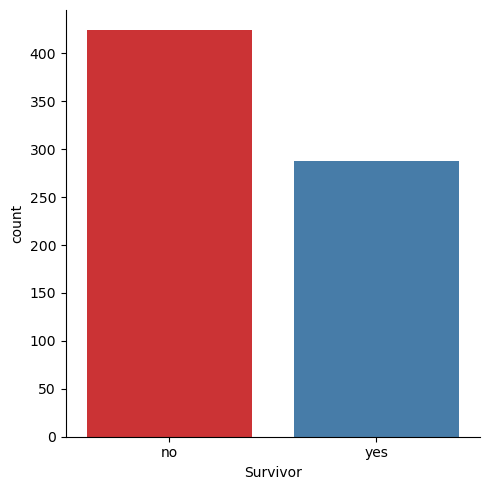

In [26]:
# Let's start by creating a new column for legibility purposes through mapping
titanic["Survivor"] = titanic.Survived.map({0: "no", 1: "yes"})

# Quick overall view of survied vs died. 
sns.catplot(x='Survivor',data=titanic,palette='Set1', kind= 'count')

37. Now, let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

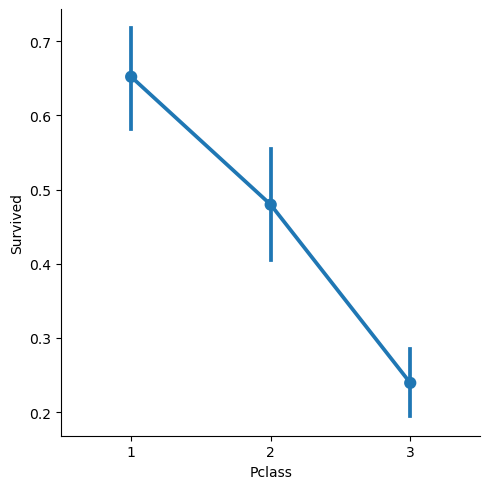

In [27]:
sns.catplot(x='Pclass',y='Survived',data=titanic, kind= 'point')

38. It appears that the survival rates for the 3rd class are substantially lower! But maybe this was caused by the large amount of men in the 3rd class, in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

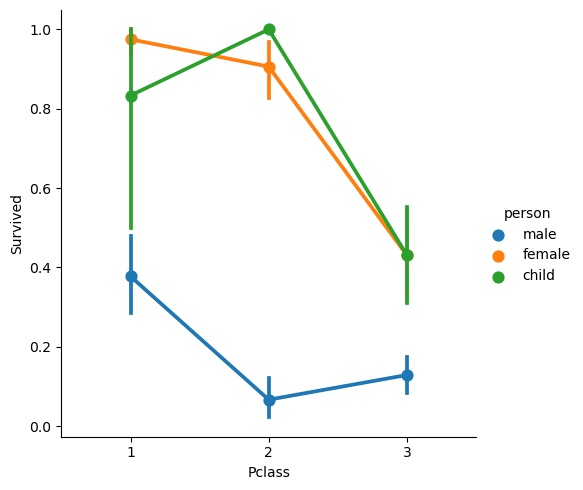

In [28]:
# Using a factor plot alongwith class and gender
sns.catplot(x='Pclass',y='Survived',hue='person',data=titanic, kind= 'point')

39. By this, we see that being a male or being in the 3rd class were both not favourable for survival. Also, regardless of the class, the result of being a male in any class dramatically decreases the chances of survival.


40. Let's move ahead and take a look at what role age played in the chances of survival.

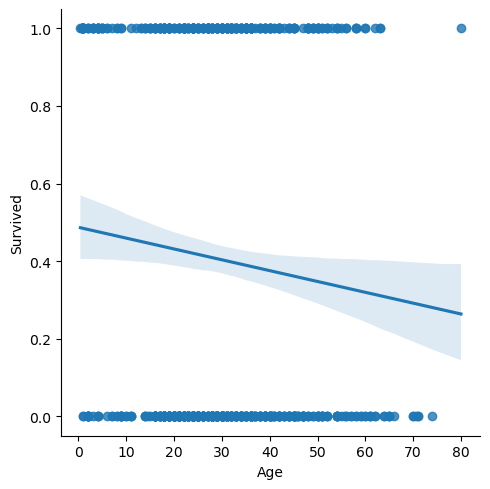

In [29]:
# Linear plot on age versus survival
sns.lmplot(x='Age',y='Survived',data=titanic)

41. We can clean this graph by using the x_bins arguement, grouping the datapoints by generations (defined in the code), and instead, adding the standard deviation.

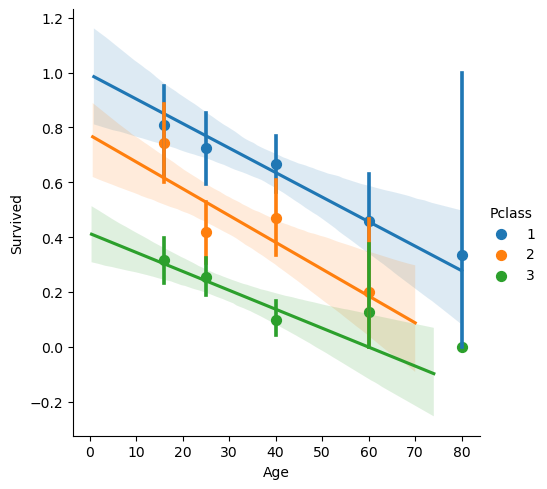

In [30]:
# Linear plot on age versus survival using hue for class seperation
generations=[16,25,40,60,80]
sns.lmplot(x='Age', y='Survived',hue='Pclass',data=titanic, x_bins=generations)

42. Again, being in the lower classes had a reduced rate of survival. Also, as we noted from the previous visualization, the older a passenger was, the less likely that they survived.


43. How are age, sex and survival linked together? Let's find out.

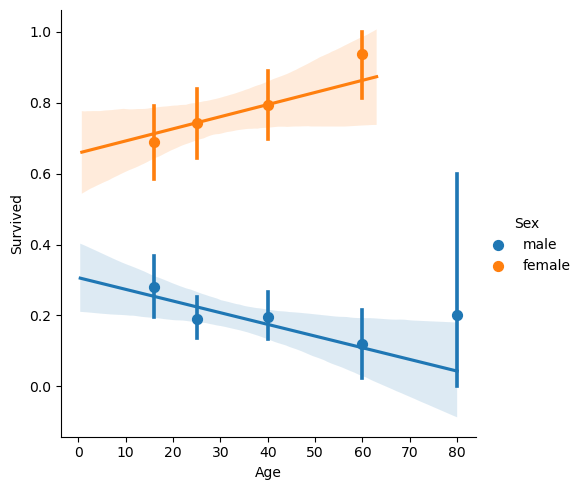

In [31]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic, x_bins=generations)

44. As mentioned above, the embarked column has C,Q,and S values. These stand for Cherbourg, Queenstown, Southhampton. 


45. Let's now dive deeper into this. We'll look at the passenger origin with respect to their gender and the Class by which they travelled.

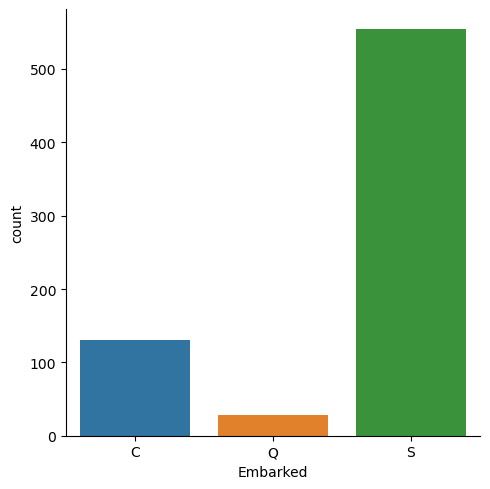

In [32]:
sns.catplot(x='Embarked',data=titanic, kind= 'count', order=['C','Q','S'])

46. Most passengers started their journey from Southampton and their number is more than the combined strength of the passengers that boarded from Cherbourg and Queenstown. Also, the least passengers boarded from Queenstown. 

47. Next up, we'll look at a plot of passenger's embarkment as per different classes(Pclass).

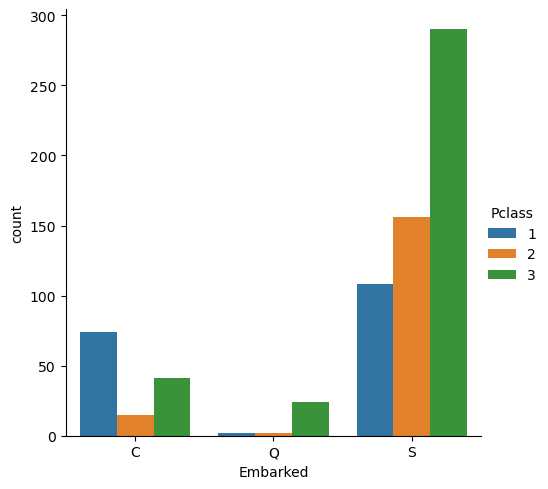

In [33]:
sns.catplot(x='Embarked',data=titanic,hue='Pclass', kind= 'count', order=['C','Q','S'])

48. We can see that in Queenstown, almost all the passengers that boarded were on 3rd class, whereas a higher number of passengers from Cherbourg were travelling in the 1st class. Southampton, which had the highest number of passengers getting onboard, had most of its passengers travelling in 3rd class. But it also had significantly higher number of passengers travelling in the other two classes as compared to the same from other stations.


49. We'll now look at how each field is related to each other, with the help of a correlation matrix.

<AxesSubplot:>

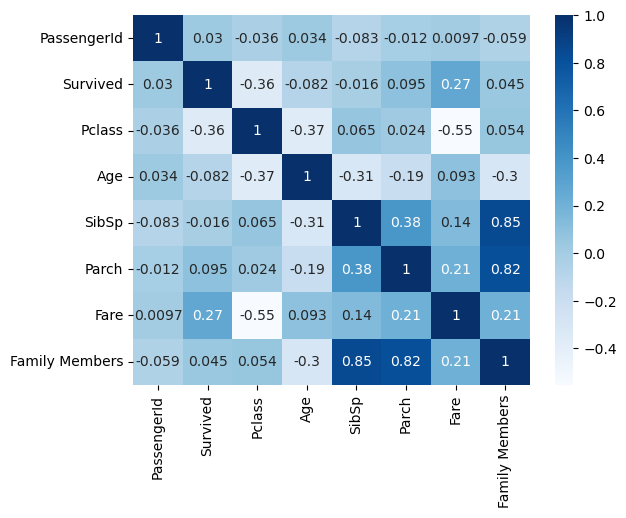

In [34]:
sns.heatmap(titanic.corr(), annot=True, cmap='Blues')

50. Strangely, there is a positive correlation between 'Survived' and 'Fare'. A negative correlation between 'Pclass' and 'Survived', and 'Fare' and 'Pclass' is also observed. 


51. Let's discuss the negative correlation  between 'Pclass' and 'Survived'. A negative corelation means one field is increasing as the other is decreasing. Here, as 'Pclass' is decreasing(going from 3, till 1), the 'Survived' field is increasing(from 0 to 1), or vice-versa. This has already been confirmed ealier during this analysis that more people in the 1st class survived as compared to passengers in the 3rd class.


52. Before wrapping up this analysis, let's find out if having family members onboard the ship was related to the survival rate.

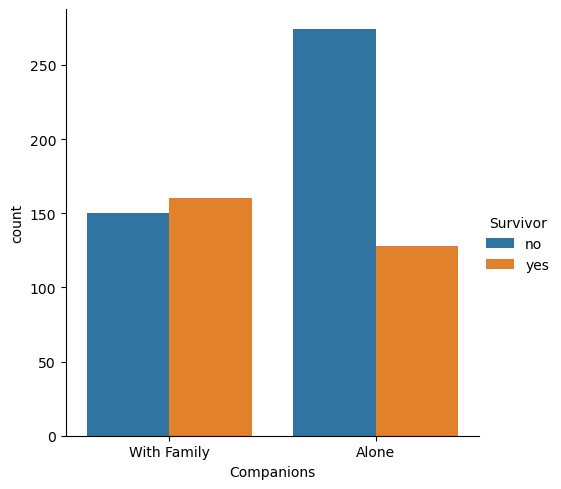

In [35]:
sns.catplot(x='Companions', data=titanic, hue= 'Survivor', kind= 'count')

53. Although of the number of survivors, more people were travelling with family than those without, but the difference isn't much. Let's use the following piece of code to check if having more number of family onboard affected the chances of survival.

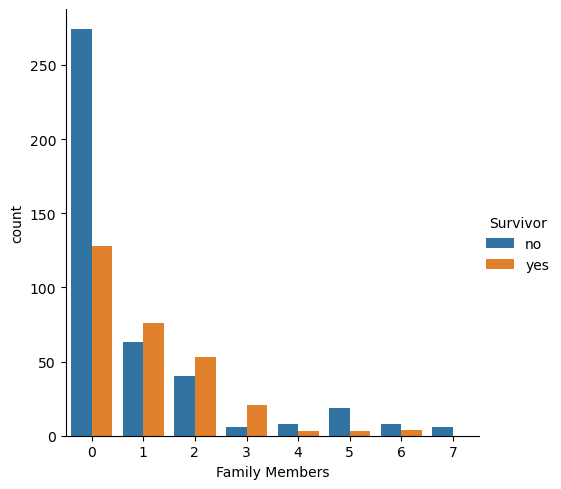

In [36]:
sns.catplot(x='Family Members', data=titanic, hue= 'Survivor', kind='count')

54. Having more family onboard didn't have a direct effect on the chances of survival of an individual. 


55. Now that we are at the end of this analysis, let's summarize the key findings:

    a. The ship had more males than females.
    
    b. Survival rate of females was the highest with 75.3%, followed by that of children (59%). Males had the least survival          rate with 20.5%.
    
    c. Most females were travelling 1st class, while most men and children were in the 3rd class.
    
    d. 1st class passengers had a higher chance of survival.
    
    e. Most passengers were aged between 20 and 40 years.
    
    f. Some passengers were travelling with as many as 7 family members.
    
    g. Southampton brought in most passengers, majority of who were travelling in 3rd class.
    
    h. 'Survived' and 'Fare' had a positive correlation.